In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"retail_sales_dataset.csv")
df

,id,quantity,price_per_unit,total_sales,discount_percent,product_category,store_location,payment_method,customer_type
0,1,5,478,2390,10,Books,Los Angeles,Cash,VIP
1,2,7,353,2471,0,Books,Los Angeles,Online Payment,New
2,3,8,73,584,20,Groceries,Chicago,Online Payment,New
3,4,18,480,8640,5,Electronics,Miami,Credit Card,New
4,5,6,357,2142,10,Electronics,Miami,Cash,Regular
...,...,...,...,...,...,...,...,...,...
195,196,20,354,7080,5,Books,Los Angeles,Online Payment,VIP
196,197,11,481,5291,5,Clothing,Chicago,Debit Card,Returning
197,198,9,407,3663,0,Furniture,Miami,Online Payment,Regular
198,199,14,393,5502,10,Clothing,Los Angeles,Debit Card,Regular


In [ ]:
df.describe()


,id,quantity,price_per_unit,total_sales,discount_percent
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,10.730000,261.730000,2849.450000,9.625000
std,57.879185,6.095315,146.866798,2519.591679,6.998519
min,1.000000,1.000000,5.000000,22.000000,0.000000
25%,50.750000,5.000000,128.000000,751.500000,5.000000
50%,100.500000,11.000000,277.500000,2060.000000,10.000000
75%,150.250000,17.000000,389.250000,4504.500000,15.000000
max,200.000000,20.000000,498.000000,9760.000000,20.000000


In [ ]:
print(df.isnull().sum())

id                  0
quantity            0
price_per_unit      0
total_sales         0
discount_percent    0
product_category    0
store_location      0
payment_method      0
customer_type       0
dtype: int64


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
print(df.dtypes)

id                   int64
quantity             int64
price_per_unit       int64
total_sales          int64
discount_percent     int64
product_category    object
store_location      object
payment_method      object
customer_type       object
dtype: object


In [ ]:
print(df.shape)

(200, 9)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                200 non-null    int64 
 1   quantity          200 non-null    int64 
 2   price_per_unit    200 non-null    int64 
 3   total_sales       200 non-null    int64 
 4   discount_percent  200 non-null    int64 
 5   product_category  200 non-null    object
 6   store_location    200 non-null    object
 7   payment_method    200 non-null    object
 8   customer_type     200 non-null    object
dtypes: int64(5), object(4)
memory usage: 14.2+ KB
None


In [ ]:
df.describe(include='object')

,product_category,store_location,payment_method,customer_type
count,200,200,200,200
unique,5,5,4,4
top,Electronics,Chicago,Online Payment,Returning
freq,47,55,62,55


In [ ]:
df['product_category'].unique()

array(['Books', 'Groceries', 'Electronics', 'Clothing', 'Furniture'],
      dtype=object)

In [ ]:
#Box Plot

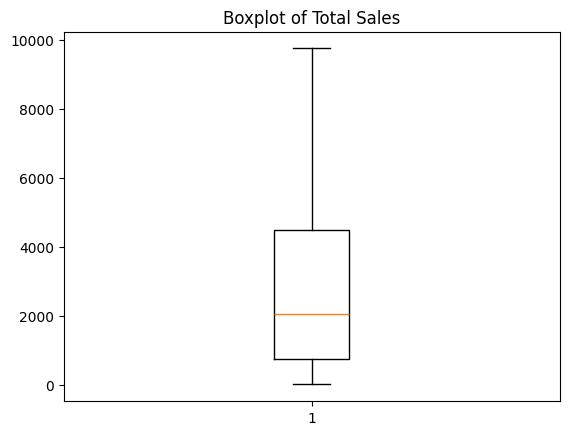

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df['total_sales'])
plt.title("Boxplot of Total Sales")
plt.show()

In [ ]:
#USE CASE 1: Quantity of item sold using bar chart
#Since quantity is discrete numeric data, bar chart gives better clarity of exact frequency.

#MOTIVE :
To understand overall sales volume
To identify purchasing patterns.

In [3]:
category_quantity = df.groupby('product_category')['quantity'].sum()

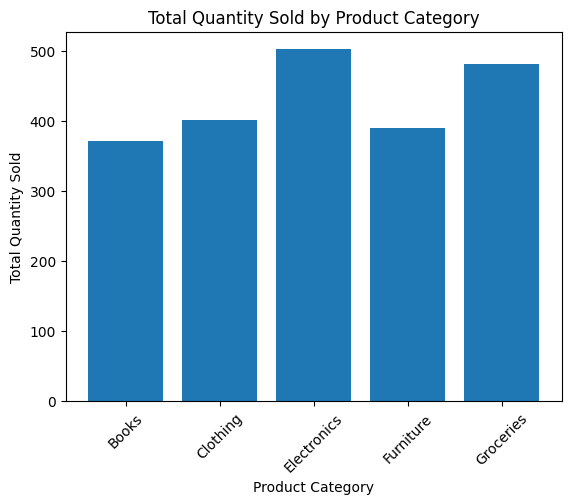

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(category_quantity.index, category_quantity.values)
plt.title("Total Quantity Sold by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
#plt.bar_label(plt.containers[0])
plt.show()

In [ ]:
total_quantity = df['quantity'].sum()
print("Total Quantity Sold:", total_quantity)

Total Quantity Sold: 2146


In [ ]:
# Average discount per prodcut categiry
print('Average discount offered for each product category',df.groupby('product_category')["discount_percent"].mean())

Average discount offered for each product category product_category
Books           9.324324
Clothing       10.256410
Electronics     9.893617
Furniture       8.939394
Groceries       9.545455
Name: discount_percent, dtype: float64


In [ ]:
#total sales per store
df.groupby("store_location")["total_sales"].sum()

store_location
Chicago        165671
Houston         85874
Los Angeles    101161
Miami          110301
New York       106883
Name: total_sales, dtype: int64

In [ ]:
#Use Case2 : varities of item sold using bar chart
here We will count how many transactions belong to each category.

#MOtive:
If one category dominates too much ... business risk increases.
If variety is balanced ... stable revenue structure.

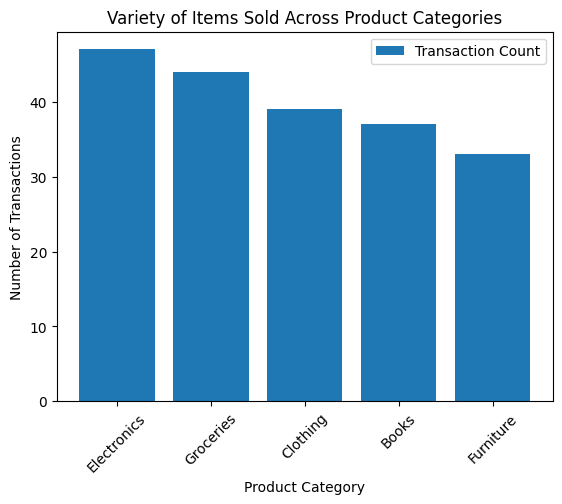

In [ ]:
import matplotlib.pyplot as plt

category_counts = df['product_category'].value_counts()

plt.figure()
plt.bar(category_counts.index, category_counts.values)
plt.title("Variety of Items Sold Across Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.legend(["Transaction Count"])
plt.show()

In [ ]:
#usecase 3:
 #Here we find the store wise total sale
#moto:
  This help us the find which store performs well and get an idea about the customer traffic

Text(0.5, 1.0, 'Total Sales by Each Store')

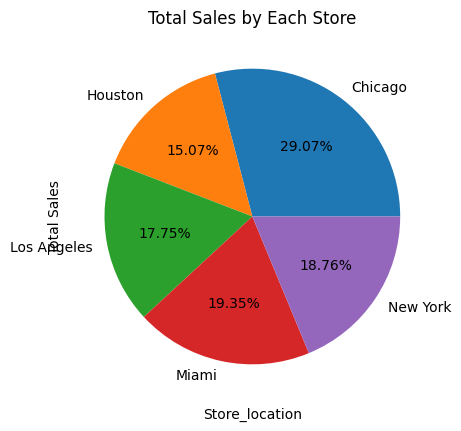

In [ ]:
import matplotlib.pyplot as plt
bar=df.groupby('store_location')['total_sales'].sum().plot(kind='pie',autopct='%2.2f%%')
#bar.pie_label(bar.containers[0])
plt.xlabel('Store_location')
plt.ylabel('Total Sales')
plt.title('Total Sales by Each Store')

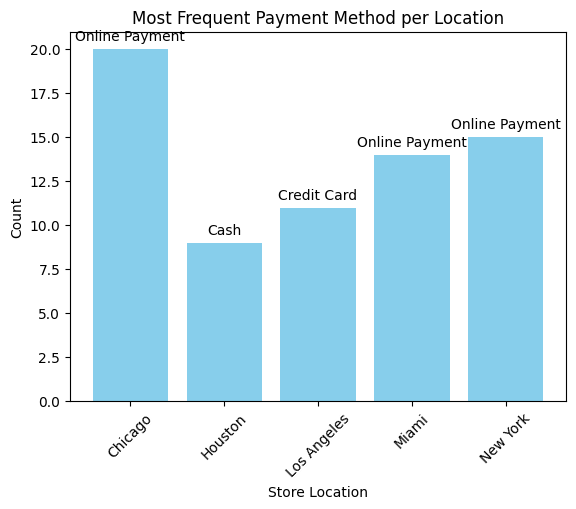

In [ ]:
#CASE 4: all the payment methods and there count by location
#Motive : This chart helps us see which payment method dominates in each store location,
#so we can adapt operations, marketing, and infrastructure to match local customer preferences.


import pandas as pd
import matplotlib.pyplot as plt


#df = pd.read_csv("retail_sales_dataset.csv")

# Count each mode of payment in each store
lpc = df.groupby(["store_location", "payment_method"]).size().reset_index(name="count")

# For each location, find the payment method with the highest count
mpl = lpc.loc[lpc.groupby("store_location")["count"].idxmax()]

# Plot
plt.bar(mpl["store_location"], mpl["count"], color="skyblue")

# Add labels
for i, method in enumerate(mpl["payment_method"]):
    plt.text(i, mpl["count"].iloc[i] + 0.5, method, ha="center")

#mpl = lpc.loc[lpc.groupby("store_location")["count"].idxmax()]


plt.title("Most Frequent Payment Method per Location")
plt.xlabel("Store Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#CASE 5:
#  category wise total sales by its location
#motive:
#Identify best sellers per location
###Spot regional preferences

In [ ]:
import pandas as pd
# Load dataset
# df = pd.read_csv("retail_sales_dataset.csv")
# Group by store location, category, and product
sales_grouped = (
    df.groupby(['store_location', 'product_category'])['total_sales']
      .sum()
      .reset_index()
)
# Sort by sales descending
sales_grouped = sales_grouped.sort_values(by='store_location', ascending=False)
sales_grouped

,store_location,product_category,total_sales
24,New York,Groceries,33686
23,New York,Furniture,20450
22,New York,Electronics,18430
21,New York,Clothing,14876
20,New York,Books,19441
19,Miami,Groceries,33451
18,Miami,Furniture,16269
17,Miami,Electronics,29624
16,Miami,Clothing,18092
15,Miami,Books,12865


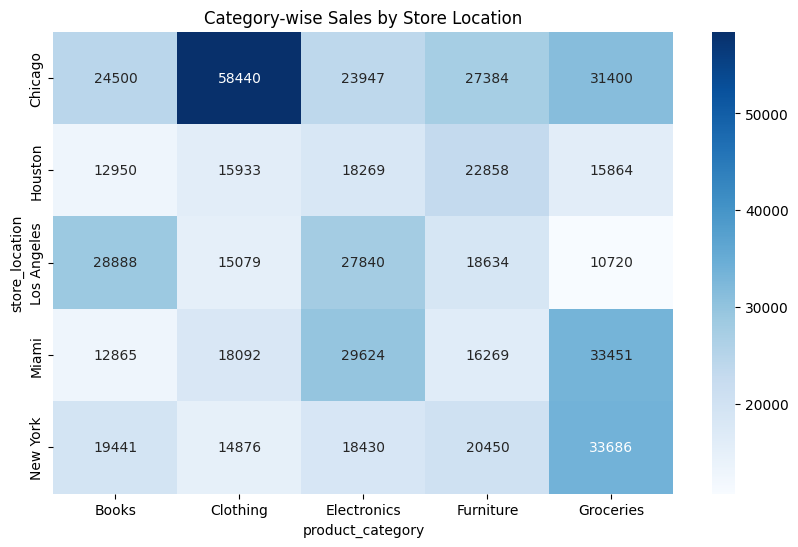

In [ ]:
#visualize using heatmap chart
import seaborn as sns
# Pivot table for heatmap
pivot_table = df.pivot_table(
    values='total_sales',
    index='store_location',
    columns='product_category',
    aggfunc='sum',
    fill_value=0
)
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="Blues")
plt.title("Category-wise Sales by Store Location")
plt.show()

customer_type   New  Regular  Returning  VIP
store_location                              
Chicago          17       12         13   13
Houston           5        8         10   12
Los Angeles       7        8          7   10
Miami             8       13         16    6
New York         10        8          9    8


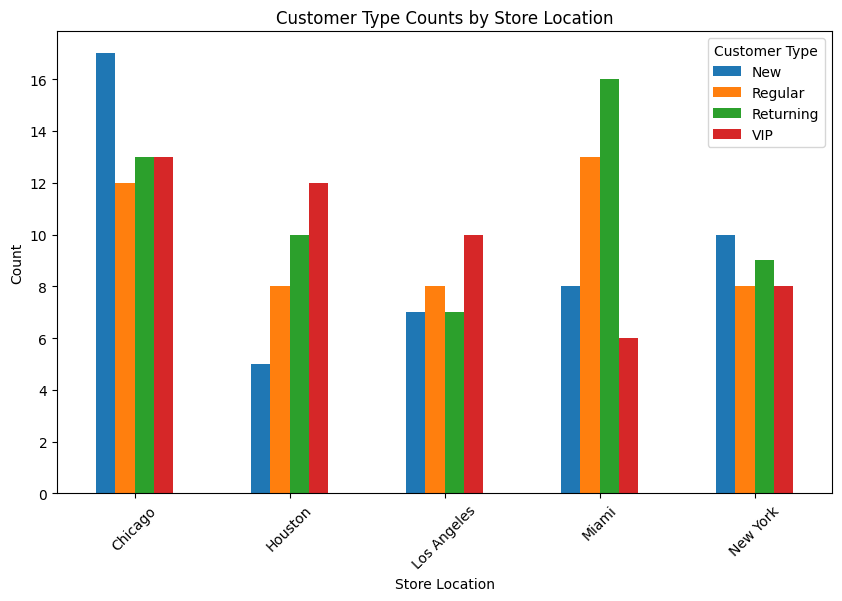

In [ ]:
#CASE 6: Distribution betwween customer type based upon location
#Helps identify what types of customers (e.g., new vs. returning, loyalty members vs. casual shoppers, business vs. individual buyers) frequent each store.

#Tailor Marketing Strategies
#Stores in different locations may attract different customer segments. Knowing the counts allows targeted promotions, localized campaigns, and personalized offers.
import matplotlib.pyplot as plt

# Group and pivot the data
counts = df.groupby(['store_location', 'customer_type']).size().unstack(fill_value=0)
print(counts)
# Plot grouped bar chart
counts.plot(kind='bar', figsize=(10,6))

plt.title('Customer Type Counts by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.show()

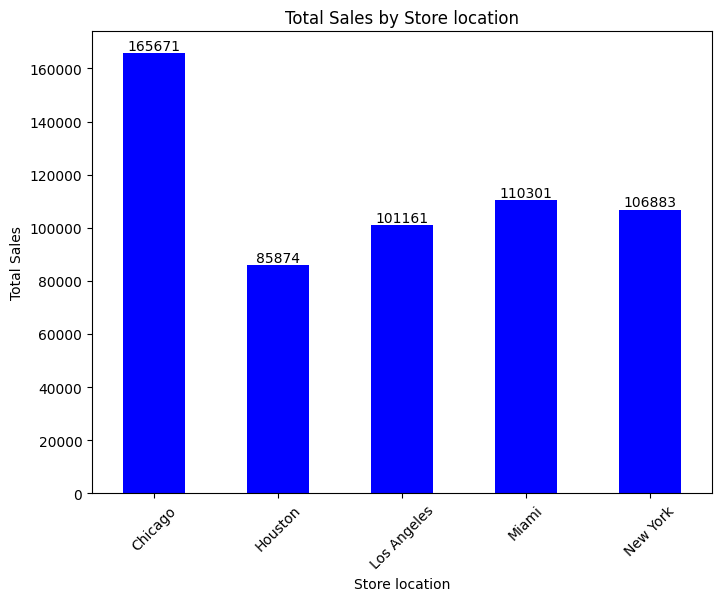

In [ ]:
# CASE 7 : TO get the total sales for each location
import matplotlib.pyplot as plt

sales_by_location = df.groupby('store_location')['total_sales'].sum()

ax = sales_by_location.plot(kind='bar', color='blue', figsize=(8,6))

# Add labels on top of bars
ax.bar_label(ax.containers[0])

plt.xlabel('Store location')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store location')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#case 8 : total sale by category

In [ ]:
df.groupby('product_category')['total_sales'].sum()

product_category
Books           98644
Clothing       122420
Electronics    118110
Furniture      105595
Groceries      125121
Name: total_sales, dtype: int64

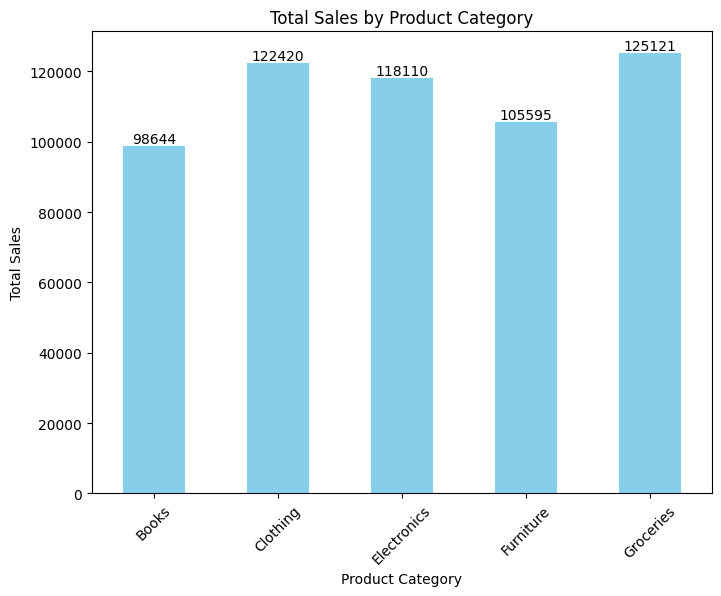

In [ ]:
import matplotlib.pyplot as plt

sales_by_category = df.groupby('product_category')['total_sales'].sum()

ax = sales_by_category.plot(kind='bar', color='skyblue', figsize=(8,6))

# Add labels on top of bars
ax.bar_label(ax.containers[0])

plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45)
plt.show()




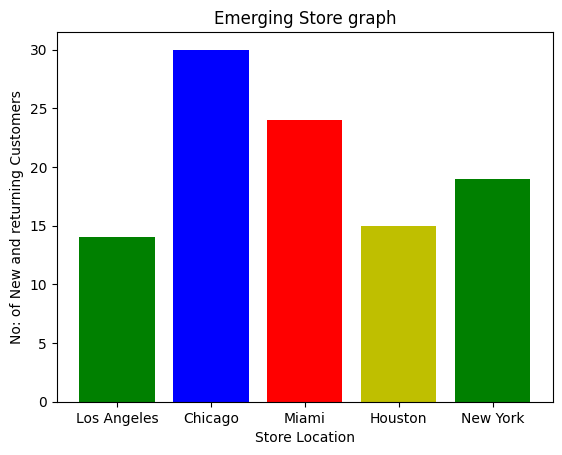

In [ ]:
#CASE 9: #we need to find the emerging store  by analysising the new and return customer
#moto:
   #here we count the number of new and returning customers for each store

product_return={}
for row in df.iterrows():
    if row[1].customer_type=='Returning' or row[1].customer_type=='New':
        product_return[row[1].store_location]=product_return.get(row[1].store_location,0)+1
plt.bar(product_return.keys(),product_return.values(),color=['g','b','r','y'])
plt.xlabel('Store Location')
plt.ylabel('No: of New and returning Customers')
plt.title("Emerging Store graph")
plt.show()